In [248]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [249]:
# Fit the following model to the data with least- squares error 

X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# define the least square error e2 function
def tempfit(c, X, Y):
    model = c[0] * np.cos(c[1] * X) + c[2] * X + c[3]
    e2 = np.sqrt(np.sum((model - Y)**2) / 31)
    return e2


[ 2.1716925   0.90932536  0.73248796 31.45279766]
Minimum Error = 1.5927258505678883
Parameters for A, B, C, D respectively = [ 2.1716925   0.90932536  0.73248796 31.45279766]


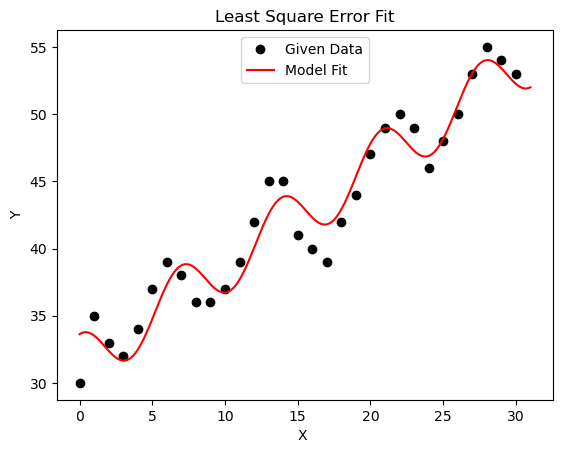

In [250]:
# (i) Code to find the minimum error and determine the parameters A, B, C, D

# optimized parameters, previously intitial guess
c0 = np.array([2.171777010, .90932523, 0.73248651, 31.45279029])
 
# perform optimization
res = opt.minimize(tempfit, c0, args=(np.arange(0, 31), Y), method='Nelder-Mead')

# get the optimized parameters for A, B, C, and D and print minimum error
c = res.x
print(c)
minimum_error = tempfit(c, X, Y)
print("Minimum Error = " + str(minimum_error))
print("Parameters for A, B, C, D respectively = " + str(c))

# generate the data for plotting
tt = np.arange(0, 31.01, 0.01)
yfit = c[0] * np.cos(c[1] * tt) + c[2] * tt + c[3]

# plot the raw data and the fitted curve
plt.plot(np.arange(0, 31), Y, 'ko', label = "Given Data")
plt.plot(tt, yfit, 'r-', label = "Model Fit")
plt.title('Least Square Error Fit')
plt.xlabel('X ')
plt.ylabel('Y')
plt.legend(loc='upper center')
plt.show()

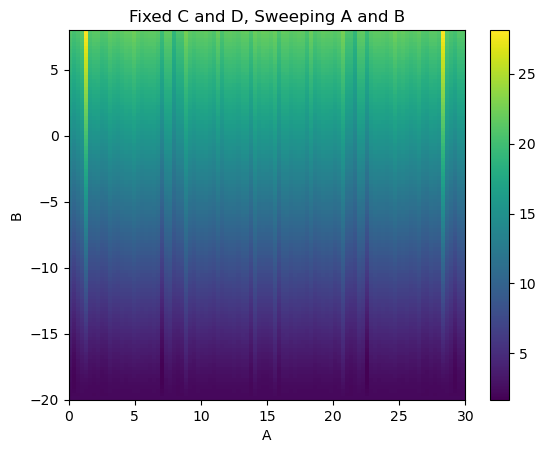

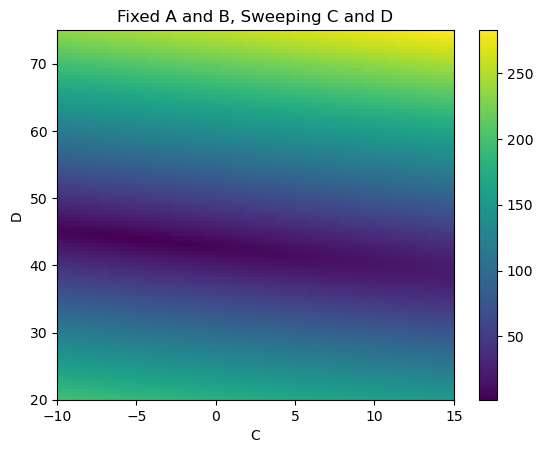

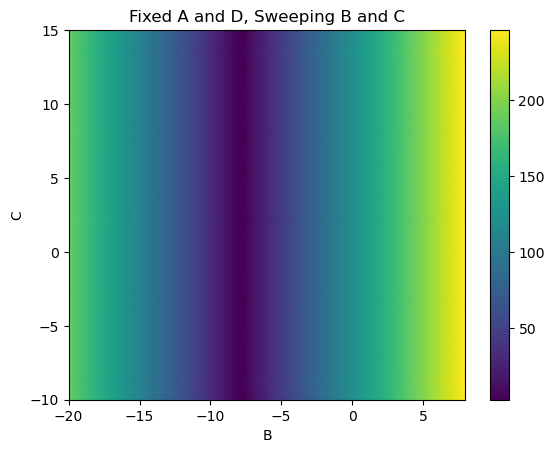

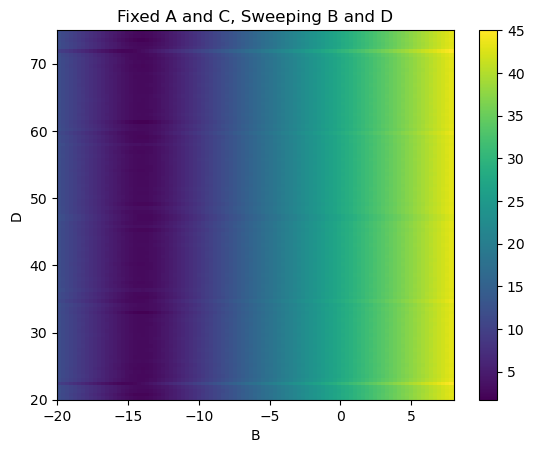

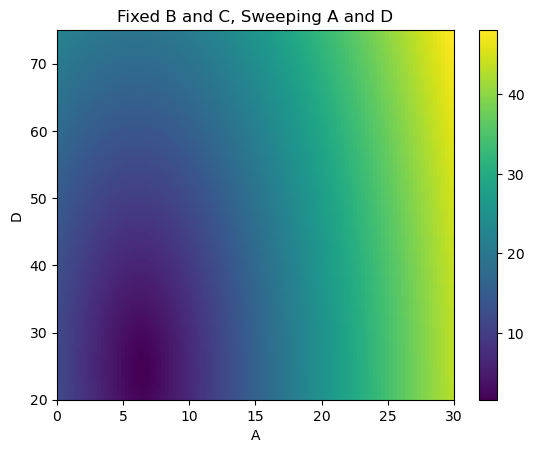

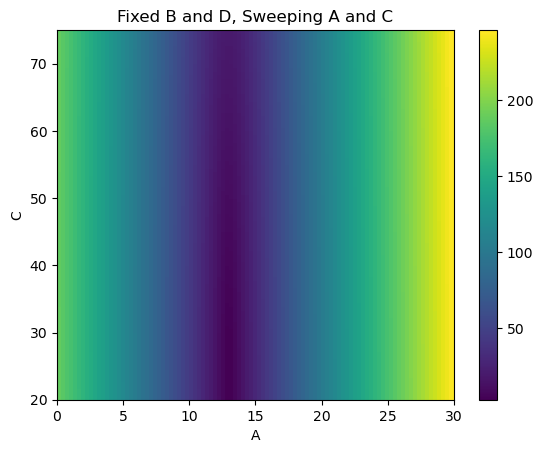

In [251]:
# (ii) With the results of (i), fix two of the parameters and sweep through values of the
# other two parameters to generate a 2D loss (error) landscape. Do all combinations of
# two fixed parameters and two swept parameters. You can use something like pcolor to
# visualize the results in a grid. 

# set the fixed values for parameters
A = c[0]
B = c[1]
C = c[2]
D = c[3]

# define the parameter values to sweep
A_vals = np.linspace(0, 30, 100)
B_vals = np.linspace(-20, 8, 100)
C_vals = np.linspace(-10, 15, 100)
D_vals = np.linspace(20, 75, 100)


## Fixed C and D ##
# initialize the loss matrix
loss = np.zeros((len(A_vals), len(B_vals)))

# loop through the parameter values and calculate the loss
for i in range(len(A_vals)):
    for j in range(len(B_vals)):
        a = A_vals[i]
        b = B_vals[j]
        c = C
        d = D
        # calculate the loss for each combination of parameter values
        loss[i,j] = tempfit([a, b, c, d], X, Y)

# plot the 2D loss landscape using pcolor
plt.pcolor(A_vals, B_vals, loss)
plt.colorbar()
plt.xlabel('A')
plt.ylabel('B')
plt.title('Fixed C and D, Sweeping A and B')
plt.show()

## Fixed A and B ##
# initialize the loss matrix
loss = np.zeros((len(C_vals), len(D_vals)))

# loop through the parameter values and calculate the loss
for i in range(len(C_vals)):
    for j in range(len(D_vals)):
        a = A
        b = B
        c = C_vals[i]
        d = D_vals[j]
        # calculate the loss for each combination of parameter values
        loss[i,j] = tempfit([a, b, c, d], X, Y)

# plot the 2D loss landscape using pcolor
plt.pcolor(C_vals, D_vals, loss)
plt.colorbar()
plt.xlabel('C')
plt.ylabel('D')
plt.title('Fixed A and B, Sweeping C and D')
plt.show()


## Fixed A and D ##
# initialize the loss matrix
loss = np.zeros((len(B_vals), len(C_vals)))

# loop through the parameter values and calculate the loss
for i in range(len(B_vals)):
    for j in range(len(C_vals)):
        a = A
        b = B_vals[i]
        c = C_vals[j]
        d = D
        # calculate the loss for each combination of parameter values
        loss[i,j] = tempfit([a, b, c, d], X, Y)

# plot the 2D loss landscape using pcolor
plt.pcolor(B_vals, C_vals, loss)
plt.colorbar()
plt.xlabel('B')
plt.ylabel('C')
plt.title('Fixed A and D, Sweeping B and C')
plt.show()

## Fixed A and C ##
# initialize the loss matrix
loss = np.zeros((len(B_vals), len(D_vals)))

# loop through the parameter values and calculate the loss
for i in range(len(B_vals)):
    for j in range(len(D_vals)):
        a = A
        b = B_vals[i]
        c = C
        d = D_vals[j]
        # calculate the loss for each combination of parameter values
        loss[i,j] = tempfit([a, b, c, d], X, Y)

# plot the 2D loss landscape using pcolor
plt.pcolor(B_vals, D_vals, loss)
plt.colorbar()
plt.xlabel('B')
plt.ylabel('D')
plt.title('Fixed A and C, Sweeping B and D')
plt.show()

## Fixed B and C ##
# initialize the loss matrix
loss = np.zeros((len(A_vals), len(D_vals)))

# loop through the parameter values and calculate the loss
for i in range(len(A_vals)):
    for j in range(len(D_vals)):
        a = A_vals[i]
        b = B
        c = C
        d = D_vals[j]
        # calculate the loss for each combination of parameter values
        loss[i,j] = tempfit([a, b, c, d], X, Y)

# plot the 2D loss landscape using pcolor
plt.pcolor(A_vals, D_vals, loss)
plt.colorbar()
plt.xlabel('A')
plt.ylabel('D')
plt.title('Fixed B and C, Sweeping A and D')
plt.show()

## Fixed B and D ##
# initialize the loss matrix
loss = np.zeros((len(A_vals), len(C_vals)))

# loop through the parameter values and calculate the loss
for i in range(len(A_vals)):
    for j in range(len(C_vals)):
        a = A_vals[i]
        b = B
        c = C_vals[j]
        d = D
        # calculate the loss for each combination of parameter values
        loss[i,j] = tempfit([a, b, c, d], X, Y)

# plot the 2D loss landscape using pcolor
plt.pcolor(A_vals, D_vals, loss)
plt.colorbar()
plt.xlabel('A')
plt.ylabel('C')
plt.title('Fixed B and D, Sweeping A and C')
plt.show()



In [ ]:
#How many minima can you find as you sweep through
# parameters?

# Contained in the Report

In [257]:
# (iii) 1. Using the first 20 data points as training data, fit a line, parabola and 19th degree
# polynomial to the data. Compute the least-square error for each of these over the training
# points.

training_data_x = X[:20]
training_data_y = Y[:20]

def linefit(c, X, Y):
    # 
    model = c[0] * X + c[1]
    e2 = np.sqrt(np.sum((model - Y)**2) / 20)
    return e2

def parabolafit(c, X, Y):
    # 
    model = c[0] * X**2 + c[1]* X + c[2]
    e2 = np.sqrt(np.sum((model - Y)**2) / 20)
    return e2

def polyfit(c, X, Y):
    model = np.polyval(c, X)
    e2 = np.sqrt(np.sum((model - Y)**2) / 20)
    return e2

#Line Coefficients 
coeff_line = np.polyfit(training_data_x, training_data_y, 1)
# calculate line error
line_error = linefit(coeff_line, training_data_x, training_data_y)
print("Minimum Line Error = " + str(line_error))

# Parabola Coefficients
coeff_parabola= np.polyfit(training_data_x, training_data_y, 2)
# Calculate Parabola Error
parabola_error = parabolafit(coeff_parabola, training_data_x, training_data_y)
print("Minimum Parabola Error = " + str(parabola_error))

# 19th degree polynomial coefficients
coeff_poly = np.polyfit(training_data_x, training_data_y, 19)
# Calculate Parabola Error
poly_error = polyfit(coeff_poly, training_data_x, training_data_y)
print("Minimum Polynomial Error = " + str(poly_error))

Minimum Line Error = 2.242749386808538
Minimum Parabola Error = 2.125539348277377
Minimum Polynomial Error = 0.028351980546237686


/Users/hanamcvicker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [240]:
# (iii) 2. Then compute the least square error of these models on the test data which are
# the remaining 10 data points.

testing_data_x = X[20:]
testing_data_y = Y[20:]

# Test
linetest_error = linefit(coeff_line, testing_data_x, testing_data_y)
print("Minimum Line Error for Test = " + str(linetest_error))

parabolatest_error = parabolafit(coeff_parabola, testing_data_x, testing_data_y)
print("Minimum Parabola Error for Test = " + str(parabolatest_error))

polytest_error = polyfit(coeff_poly, testing_data_x, testing_data_y)
print("Minimum Polynomial Error for Test = " + str(polytest_error))

Minimum Line Error for Test = 2.494541250541458
Minimum Parabola Error for Test = 6.4622171161819395
Minimum Polynomial Error for Test = 21226922000.86121


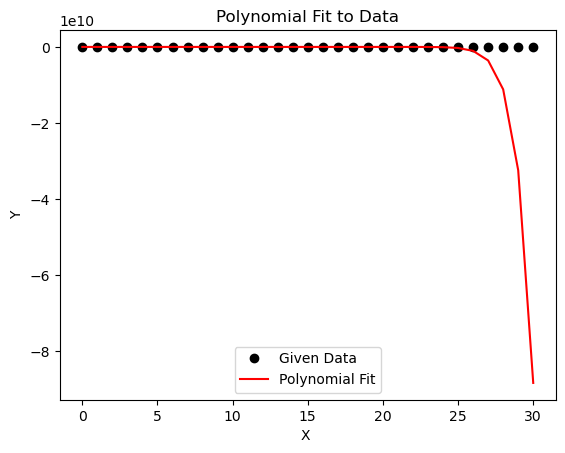

In [276]:
# To show extreme error in Results on ReadMe File
x = np.arange(0, 31)
plt.plot(x, Y, 'ko', label = "Given Data")
plt.plot(x, np.polyval(coeff_poly, x), 'r-', label = "Polynomial Fit")

plt.title('Polynomial Fit to Data')
plt.xlabel('X ')
plt.ylabel('Y')
plt.legend(loc='lower center')
plt.show()

In [241]:
# (iv) Repeat (iii) but use the first 10 and last 10 data points as training data. Then fit the
# model to the test data (which are the 10 held out middle data points). Compare these
# results to (iii)

first_tenX = X[:10]
last_tenX = X[-10:]

first_tenY = Y[:10]
last_tenY = Y[-10:]

# Concatenate the first ten and last ten numbers into a single array
X_data = np.concatenate((first_tenX, last_tenX))
Y_data = np.concatenate((first_tenY, last_tenY))

training_data_x = X_data
training_data_y = Y_data

def linefit(c, X, Y):
    # 
    model = c[0] * X + c[1]
    e2 = np.sqrt(np.sum((model - Y)**2) / 20)
    return e2

def parabolafit(c, X, Y):
    # 
    model = c[0] * X**2 + c[1]* X + c[2]
    e2 = np.sqrt(np.sum((model - Y)**2) / 20)
    return e2

def polyfit(c, X, Y):
    model = np.polyval(c, X)
    e2 = np.sqrt(np.sum((model - Y)**2) / 20)
    return e2

#Line Coefficients 
coeff_line = np.polyfit(training_data_x, training_data_y, 1)
# calculate line error
line_error = linefit(coeff_line, training_data_x, training_data_y)
print("Minimum Line Error = " + str(line_error))

# Parabola Coefficients
coeff_parabola= np.polyfit(training_data_x, training_data_y, 2)
# Calculate Parabola Error
parabola_error = parabolafit(coeff_parabola, training_data_x, training_data_y)
print("Minimum Parabola Error = " + str(parabola_error))

# 19th degree polynomial coefficients
coeff_poly = np.polyfit(training_data_x, training_data_y, 19)
# Calculate Parabola Error
poly_error = polyfit(coeff_poly, training_data_x, training_data_y)
print("Minimum Polynomial Error = " + str(poly_error))



Minimum Line Error = 1.8516699043293745
Minimum Parabola Error = 1.8508364115957905
Minimum Polynomial Error = 0.16380428828053126


/Users/hanamcvicker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [242]:
testing_data_x = X[10:20]
testing_data_y = Y[10:20]

# Test
linetest_error = linefit(coeff_line, testing_data_x, testing_data_y)
print("Minimum Line Error for Test = " + str(linetest_error))

parabolatest_error = parabolafit(coeff_parabola, testing_data_x, testing_data_y)
print("Minimum Parabola Error for Test = " + str(parabolatest_error))

polytest_error = polyfit(coeff_poly, testing_data_x, testing_data_y)
print("Minimum Polynomial Error for Test = " + str(polytest_error))

Minimum Line Error for Test = 2.0791117137297803
Minimum Parabola Error for Test = 2.0547178083104174
Minimum Polynomial Error for Test = 358.764597059217
